# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We are defining all variables and functions in our py.file. We then create 2 arrays with numbers between 0 and 1, for the x-values for person A. We then set up 2 empty arrays, that we are gonna use to fill up with the possible consumption of goods. We do this by making a loop that adds values to the array, if the utility is better or equal to the utility from the endownment. 

In [96]:
model = ExchangeEconomyClass()
N=75
w1A = 0.8
w2A = 0.3

x1A = np.linspace(0, 1, N+1)
x2A = np.linspace(0, 1, N+1)

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B(1-x1,1-x2) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)



Now we plot an Edgeworth box with the initial endownment shown and all the possible values found above. 

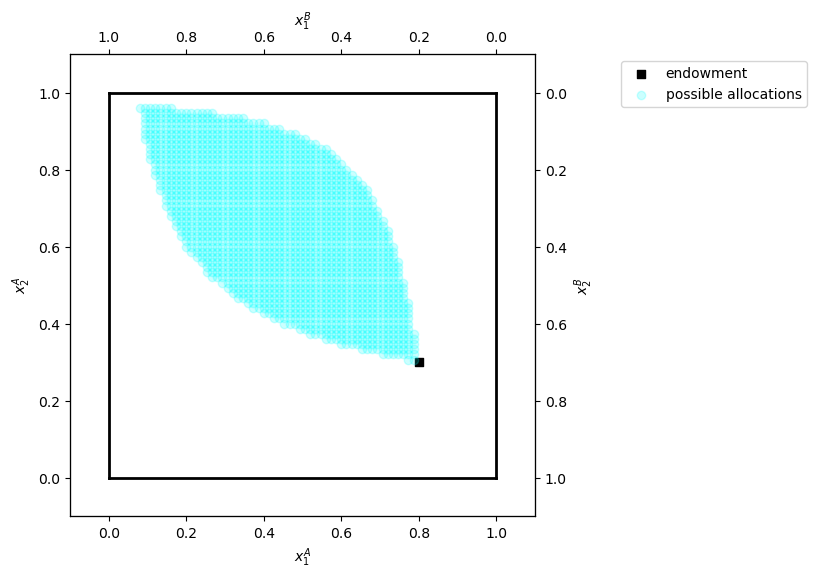

In [97]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x1possible,x2possible,marker='o',alpha=0.2,color='cyan',label='possible allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

We know that our check_market_clearing gives us two values. 
One for the first error term and one of the second error term. 
See # in the code for decription of each step. 

[(0.533333333333333, -0.2666666666666666), (0.47594936708860747, -0.25066666666666654), (0.42409638554216866, -0.23466666666666652), (0.3770114942528735, -0.2186666666666665), (0.334065934065934, -0.2026666666666665), (0.29473684210526296, -0.18666666666666654), (0.2585858585858585, -0.1706666666666664), (0.22524271844660176, -0.1546666666666665), (0.19439252336448576, -0.1386666666666665), (0.16576576576576557, -0.12266666666666659)]


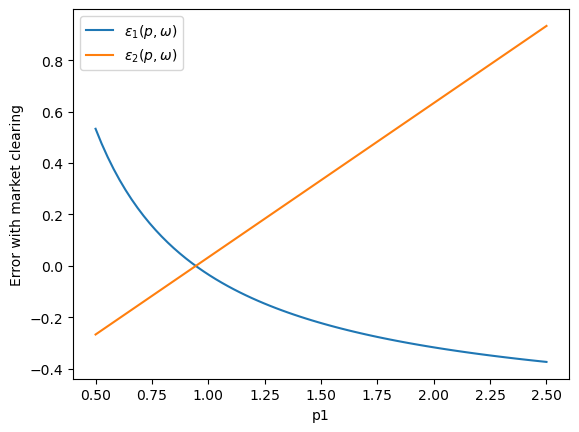

In [98]:

#We start of by making an empty list, so we can fill in the values
p1 = []
#We fill out this list by making a for loop
for t in range (N+1):
    p1.append(0.5+2*t/N)
#We do the same for the error term.
e = []
for t in p1:
    e.append(model.check_market_clearing(t))

#We print the first 10 values of the error term to check if it works
print(e[0:10])

# We extract error term 1 and error term 2 from the e list
error_term_1 = [error[0] for error in e]
error_term_2 = [error[1] for error in e]

# Plot error term 1 and error term 2
plt.plot(p1 ,error_term_1, label='$\epsilon_1(p,\omega)$')
plt.plot(p1 ,error_term_2, label='$\epsilon_2(p,\omega)$')

# We then add labels and legend
plt.xlabel('p1')
plt.ylabel('Error with market clearing')
plt.legend()

# At last, we show the plot
plt.show()



# Question 3

To find the market clearing price we expect that the error term closest to 0 gives us the p1 that clears the market. We define the error_term_0 as absolute value, to avoid a negative number. 

In [99]:
#First we define the error term that is closest to zero
error_term_0 = np.abs(error_term_1).argmin()

#Then we find the price that clears the market
market_clearing_p1 = p1[error_term_0]

#We print the price that clears the market
print(f'The market clearing price is p1 = {market_clearing_p1:.2f}')



The market clearing price is p1 = 0.95


# Question 4a.

Now we will find the allocation when prices only are allowed to be in the defined P1. 


In [100]:
#We start of by choosing -infinity as the starting point
util_A_best = -np.inf
best_allocation_p1 = []

# We will then be looping over p1, in the price vector we made in question 2
for t in p1:

    # We then make sure that A ends up with a positive amount of both goods
    if 1 >= 1-model.demand_B(t)[0] > 0 and 1 >= 1-model.demand_B(t)[1]>0:

        # We can now calculate the utility of A
        util_A = model.utility_A(1-model.demand_B(t)[0], 1-model.demand_B(t)[1])
        
        # The if statement is now made to update util_A_best if util_A is larger
        if util_A > util_A_best:
            util_A_best = util_A
            best_allocation_p1 = t

#We print the results
print(f'She chooses the price p1 = {best_allocation_p1:.2f} so her utility is then {util_A_best:.2f}')
print(f'Therefore her allocation of the goods are: x1A = {model.demand_A(best_allocation_p1)[0]:.2f} and x2A = {model.demand_A(best_allocation_p1)[1]:.2f}')


She chooses the price p1 = 1.89 so her utility is then 0.63
Therefore her allocation of the goods are: x1A = 0.32 and x2A = 1.21


# Question 4b.

We will do the same as in question 4a. 
But now the price can take any value. 
So the new thing in 4b. is that we choose an array between 0 and 50, which are the new possible values of the price, p1. 

In [108]:
#Now the price can take any value, and not only be in p1 vector. 
#We therefore define a new best value of utility, and sets up an empty list for the best allocation of p1.
util_A_best_new = -np.inf
best_allocation_p1_new = []

# We will then be looping over p1, in the price vector we made in question 2
for t in np.arange(0, 50, 0.01):

    # Be sure that the good left over for A is of positive utility since negative good quantities will correspond to a utility value in complex numbers
    if 1-model.demand_B(t)[0] > 0 and 1-model.demand_B(t)[1]>0:

        # Compute the utility for the good left over for A
        util_A = model.utility_A(1-model.demand_B(t)[0], 1-model.demand_B(t)[1])
        
        # Update util_A_best if ua is of higher value
        if util_A > util_A_best_new:
            util_A_best_new = util_A
            best_allocation_p1_new = t

print(f'She chooses the price p1 = {best_allocation_p1_new:.2f} so her utility is then {util_A_best_new:.2f}')
print(f'Therefore her allocation of the goods are: x1A = {model.demand_A(best_allocation_p1_new)[0]:.2f} and x2A = {model.demand_A(best_allocation_p1_new)[1]:.2f}')


She chooses the price p1 = 1.90 so her utility is then 0.63
Therefore her allocation of the goods are: x1A = 0.32 and x2A = 1.21


We see that the allocantion that she ends up with is nearly identical as the one she gets, if the price only can be chosen from p1. 

# Question 5a.

When only the choice is restricted to be in C, we use our result frpm question 1, to set uo a looå to find the best allocation. 

In [102]:
#We start off by setting the starting point to -infinity
util_A_better = -np.inf

#We then use our results in question 1 to make a list, C that contains all possible combinations of x1 and x2.
C = zip(x1possible,x2possible)

#We then loop over the list C, and find the combination of x1 and x2 that gives the highest utility for A, and also gives a utility for B that is higher than the utility of B at the initial endowment.
for x_1 , x_2 in C:
        util_A_start = model.utility_A(x_1,x_2)
        if model.utility_A(x_1,x_2) >= util_A_better and model.utility_B(1-x_1,1-x_2) >= model.utility_B(1-0.8,1-0.3):
            util_A_better = util_A_start
            x_1_op = x_1 
            x_2_op = x_2

#At last we print the results
print(f'Utility A max = {util_A_better:.3f}: (x1A,x2A) = ({x_1_op:.3f},{x_2_op:.3f})')
print(f'Utility B max = {model.utility_B(1-x_1_op,1-x_2_op):.3f}: (x1B,x2B) = ({1-x_1_op:.3f},{1-x_2_op:.3f})')


Utility A max = 0.742: (x1A,x2A) = (0.560,0.853)
Utility B max = 0.305: (x1B,x2B) = (0.440,0.147)


# Question 5b.

Now the only restriction is, that B's utility have to be at least as good as the intial utility of the endownment. To solve this we create 2 lists with linear numbers between 0 to 1. Then we set up a loop to find the best allocation. 

In [103]:
#We start off by setting the starting point to -infinity again
util_A_better_2 = -np.inf

#We then create 2 lists that contains 2000 values between 0 and 1 that are linear spaced.
list_a = np.linspace(0 , 1 , 2000)
list_b = np.linspace(0 , 1 , 2000)

#We then loop over the 2 lists, and find the combination of x1 and x2 that gives the highest utility for A, and also gives a utility for B that is higher or equal to than the utility of B at the initial endowment.
for x_1_a in list_a:
        for x_2_a in list_b:
             util_A_start_2 = model.utility_A(x_1_a,x_2_a)
             if model.utility_A(x_1_a,x_2_a) >= util_A_better and model.utility_B(1-x_1_a,1-x_2_a) >= model.utility_B(1-0.8,1-0.3):
                  util_A_better_2 = util_A_start_2
                  x_1_opti = x_1_a 
                  x_2_opti = x_2_a

#At last we print the results
print(f'Utility A max = {util_A_better_2:.3f}: (x1A,x2A) = ({x_1_opti:.3f},{x_2_opti:.3f})')
print(f'Utility B max = {model.utility_B(1-x_1_opti,1-x_2_opti):.3f}: (x1B,x2B) = ({1-x_1_opti:.3f},{1-x_2_opti:.3f})')

Utility A max = 0.742: (x1A,x2A) = (0.602,0.823)
Utility B max = 0.304: (x1B,x2B) = (0.398,0.177)


# Question 6a.

In [104]:
#We start off by setting the starting point to -infinity again
util_A_social = -np.inf

#Again we then create 2 lists that contains 2000 values between 0 and 1 that are linear spaced.
list_a_social = np.linspace(0 , 1 , 2000)
list_b_social = np.linspace(0 , 1 , 2000)

#We then loop over the 2 lists, and find the combination of x1 and x2 that gives the highest utility for both A and B. 
for x_1_a_social in list_a_social:
        for x_2_a_social in list_b_social:
             util_A_start_social = model.utility_A(x_1_a_social,x_2_a_social) + model.utility_B(1-x_1_a_social,1-x_2_a_social)
             if util_A_start_social >= util_A_social:
                  util_A_social = util_A_start_social
                  x_1_opti_social = x_1_a_social 
                  x_2_opti_social = x_2_a_social
#At last we print the results
print(f'Utility A + B max = {util_A_social:.3f}: The allocation is (x1A,x2A) = ({x_1_opti_social:.3f},{x_2_opti_social:.3f}), (x1B,x2B) = ({1-x_1_opti_social:.3f},{1-x_2_opti_social:.3f})')


Utility A + B max = 1.058: The allocation is (x1A,x2A) = (0.334,0.667), (x1B,x2B) = (0.666,0.333)


# Question 6b.

We now illustrate the allocations from the results in the edgeworthbox from question 1. 

5a. Utility A+B = 1.047 
5b. Utility A+B = 1.045
6a. Utility A+B = 1.058


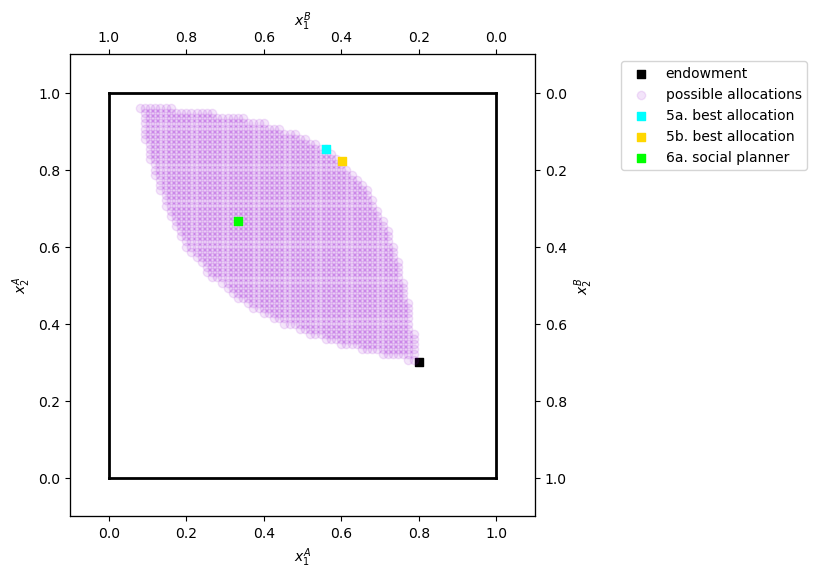

In [105]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We now plot the allocations
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x1possible,x2possible,marker='o',alpha=0.1,color='darkviolet',label='possible allocations')
ax_A.scatter(x_1_op,x_2_op,marker='s',color='cyan',label='5a. best allocation')
ax_A.scatter(x_1_opti,x_2_opti,marker='s',color='gold',label='5b. best allocation')
ax_A.scatter(x_1_opti_social,x_2_opti_social, marker='s',color='lime',label='6a. social planner')
# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

print(f'5a. Utility A+B = {util_A_better+model.utility_B(1-x_1_op,1-x_2_op):.3f} ')
print(f'5b. Utility A+B = {util_A_better_2+model.utility_B(1-x_1_opti,1-x_2_opti):.3f}')
print(f'6a. Utility A+B = {util_A_social:.3f}')


The total utilites from the 3 different questions are shown above the edgeworthbox. It is seen that the highest total amount of utility is accomplished by the social planner and not when person A chooses. 
This results come from the following: 
When A is choosing the allocation she will try to maximze her own utility, and doest not take B's utlity into account, as long as B is not worse off with regards to the endownment. 
When the social planner is chosing the allocation, she takes both persons utility into account. 


# Question 7

Explain what we do

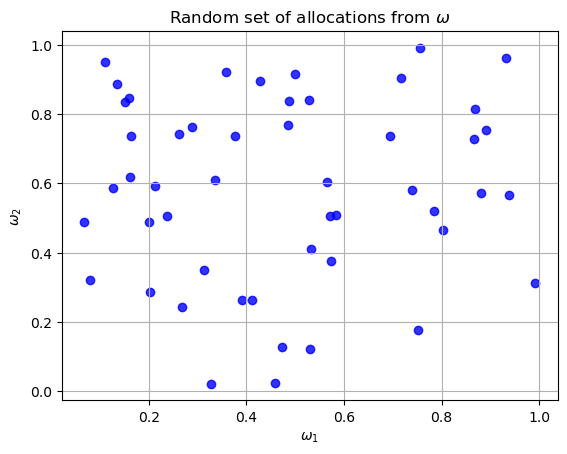

In [106]:
np.random.seed(2000)

omega_1 = np.random.uniform(0,1,50)
omega_2 = np.random.uniform(0,1,50)

#We create a scatterplot for omega_1 and omega_2
plt.scatter(omega_1, omega_2, color='blue', marker='o', alpha=0.8)
plt.xlabel('$\omega_1$')
plt.ylabel('$\omega_2$')
plt.title('Random set of allocations from $\omega$')
plt.grid(True)
plt.show()


# Question 8

Write what we do